# Wiederholung Numpy

In [3]:
import numpy as np
print(np.ones(6).reshape(2,3))

[[1. 1. 1.]
 [1. 1. 1.]]


# Sinus generieren mit linspace

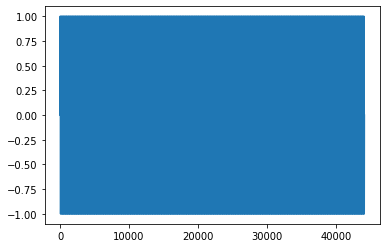

In [57]:
import matplotlib.pyplot as plt
from IPython.display import Audio

sample_rate = 44100
length = 3
freq = 440


t = np.linspace(0, 2 * np.pi  * freq, sample_rate)
sinus = np.sin(t)
plt.plot(sinus)

display(Audio(sinus, rate = sample_rate))


# Sinus mit Stille am Anfang und Ende

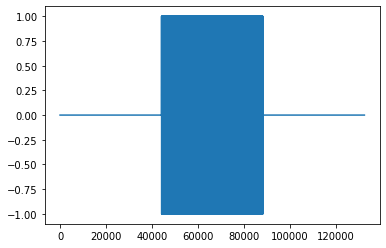

In [5]:
sample_rate = 44100
length = 3
freq = 440




t = np.linspace(0, 2 * np.pi  * freq, sample_rate)
sinus = np.sin(t)
zero_sinus = np.append(np.zeros(sample_rate), sinus)
new_sine = np.append(zero_sinus, np.zeros(sample_rate))

plt.plot(new_sine)

display(Audio(new_sine, rate = sample_rate))

# Attack steuern

44100


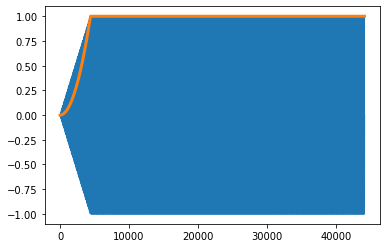

In [55]:
sample_rate = 44100
length = 3
freq = 440

t = np.linspace(0, 1 * np.pi * 2 * freq, sample_rate)

attack_exp = np.append(np.linspace(0, 1, int(sample_rate * 0.1)), np.ones(int(sample_rate * 0.9)))**2
attack_lin = np.append(np.linspace(0, 1, int(sample_rate * 0.1)), np.ones(int(sample_rate * 0.9)))

print(np.size(attack_exp))

sinus_exp = np.sin(t) * attack_exp
sinus_lin = np.sin(t) * attack_lin

plt.plot(sinus_lin)

plt.plot(attack_exp, linewidth=3)


display(Audio(sinus_lin, rate = sample_rate))
display(Audio(sinus_exp, rate = sample_rate))


# Hüllkurve erzeugen
Hier ist es wichtig den scale value f+r die Länge unserer Envelope an der richtigen stelle zu verrechnen. </p>
Würden wir den scale value erst in der letzten Zeile (return np.concatenate...) verrechnen, wird er auf alle Werte des resultierenden Arrays aus np.concatenate angewendet, allerdings nicht deren Anzahl (= Anzahl der Samples = Länge des Signals) und somit würden wir im nächsten schritt (sinus_env = sinus * env) die Amplitude unseres Signals modulieren ! 
    
    

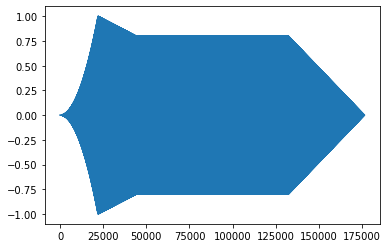

In [67]:
length_scale = 1
sample_rate = 44100
length = 4 * length_scale
freq = 440


t = np.linspace(0, 1 * np.pi * 2 * freq * length, sample_rate * length)
sinus = np.sin(t)

#attack = np.linspace(0, 1, int(sample_rate * 0.5))
#decay = np.linspace(1, 0.8, int(sample_rate * 0.5))
#sustain = np.ones(int(sample_rate * 2)) - 0.2
#release = np.linspace(0.8, 0, int(sample_rate))

def generate_adsr(attack = 0.5, decay = 0.5, sustain = 2, release = 1, sample_rate = 44100, scale = 1):
    
    a = np.linspace(0, 1, int(sample_rate * attack * scale ))**2
    d = np.linspace(1, 0.8, int(sample_rate * decay * scale))
    s = np.ones(int(sample_rate * sustain * scale)) - 0.2
    r = np.linspace(0.8, 0, int(sample_rate * release * scale))
    return np.concatenate((a, d, s, r)) 
 
    
env = generate_adsr(scale = length_scale)

sinus_env = sinus * env


plt.plot(sinus_env)

display(Audio(sinus, rate = sample_rate))
